# 2) Data Visualisation

In [829]:
sievedtmdbdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10233 entries, 0 to 347099
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10233 non-null  int64  
 1   title                 10233 non-null  object 
 2   status                10233 non-null  object 
 3   revenue               10233 non-null  float64
 4   vote_average          10233 non-null  float64
 5   vote_count            10233 non-null  float64
 6   runtime               10233 non-null  float64
 7   adult                 10233 non-null  bool   
 8   budget                10233 non-null  float64
 9   original_language     10233 non-null  object 
 10  popularity            10233 non-null  float64
 11  genres                10233 non-null  object 
 12  production_companies  9797 non-null   object 
 13  production_countries  9929 non-null   object 
 14  spoken_languages      10041 non-null  object 
dtypes: bool(1), float64(6),

# Numerical Data

we will first take a look at the numerical data in the dataset

In [830]:
numericaldata= sievedtmdbdata[["revenue","vote_average","budget","popularity","runtime", "vote_count"]]

# Explanation for selecting these numerical data



for our numerical variables, our variables ranges from vote_average,budget,popularity,runtime and vote count. All these numerical were taken as they may be variables that are helpful in prediction of the revenue for a upcoming movie. For example, the revenue that a movie made may be dependent on what budget was available to make the movie

### We will now look at the statistical description of our numerical data

In [831]:
numericaldata.describe()

,revenue,vote_average,budget,popularity,runtime,vote_count
count,1.023300e+04,10233.000000,1.023300e+04,10233.000000,10233.000000,10233.000000
mean,6.515736e+07,6.503304,2.316013e+07,18.951971,105.796541,1494.462035
std,1.550578e+08,1.197465,3.772328e+07,60.993327,29.740430,2953.376716
min,1.000000e+00,0.800000,1.000000e+00,0.600000,1.000000,1.000000
25%,1.601000e+06,5.867000,2.000000e+06,5.992000,93.000000,57.000000
50%,1.223263e+07,6.496000,9.000000e+06,12.859000,104.000000,378.000000
75%,5.650506e+07,7.108000,2.700000e+07,20.317000,120.000000,1507.000000
max,2.923706e+09,10.000000,4.600000e+08,2994.357000,540.000000,34495.000000


### Now we plot the boxplot, histogramplot and violinplot for each of our numerical variables

<Axes: >

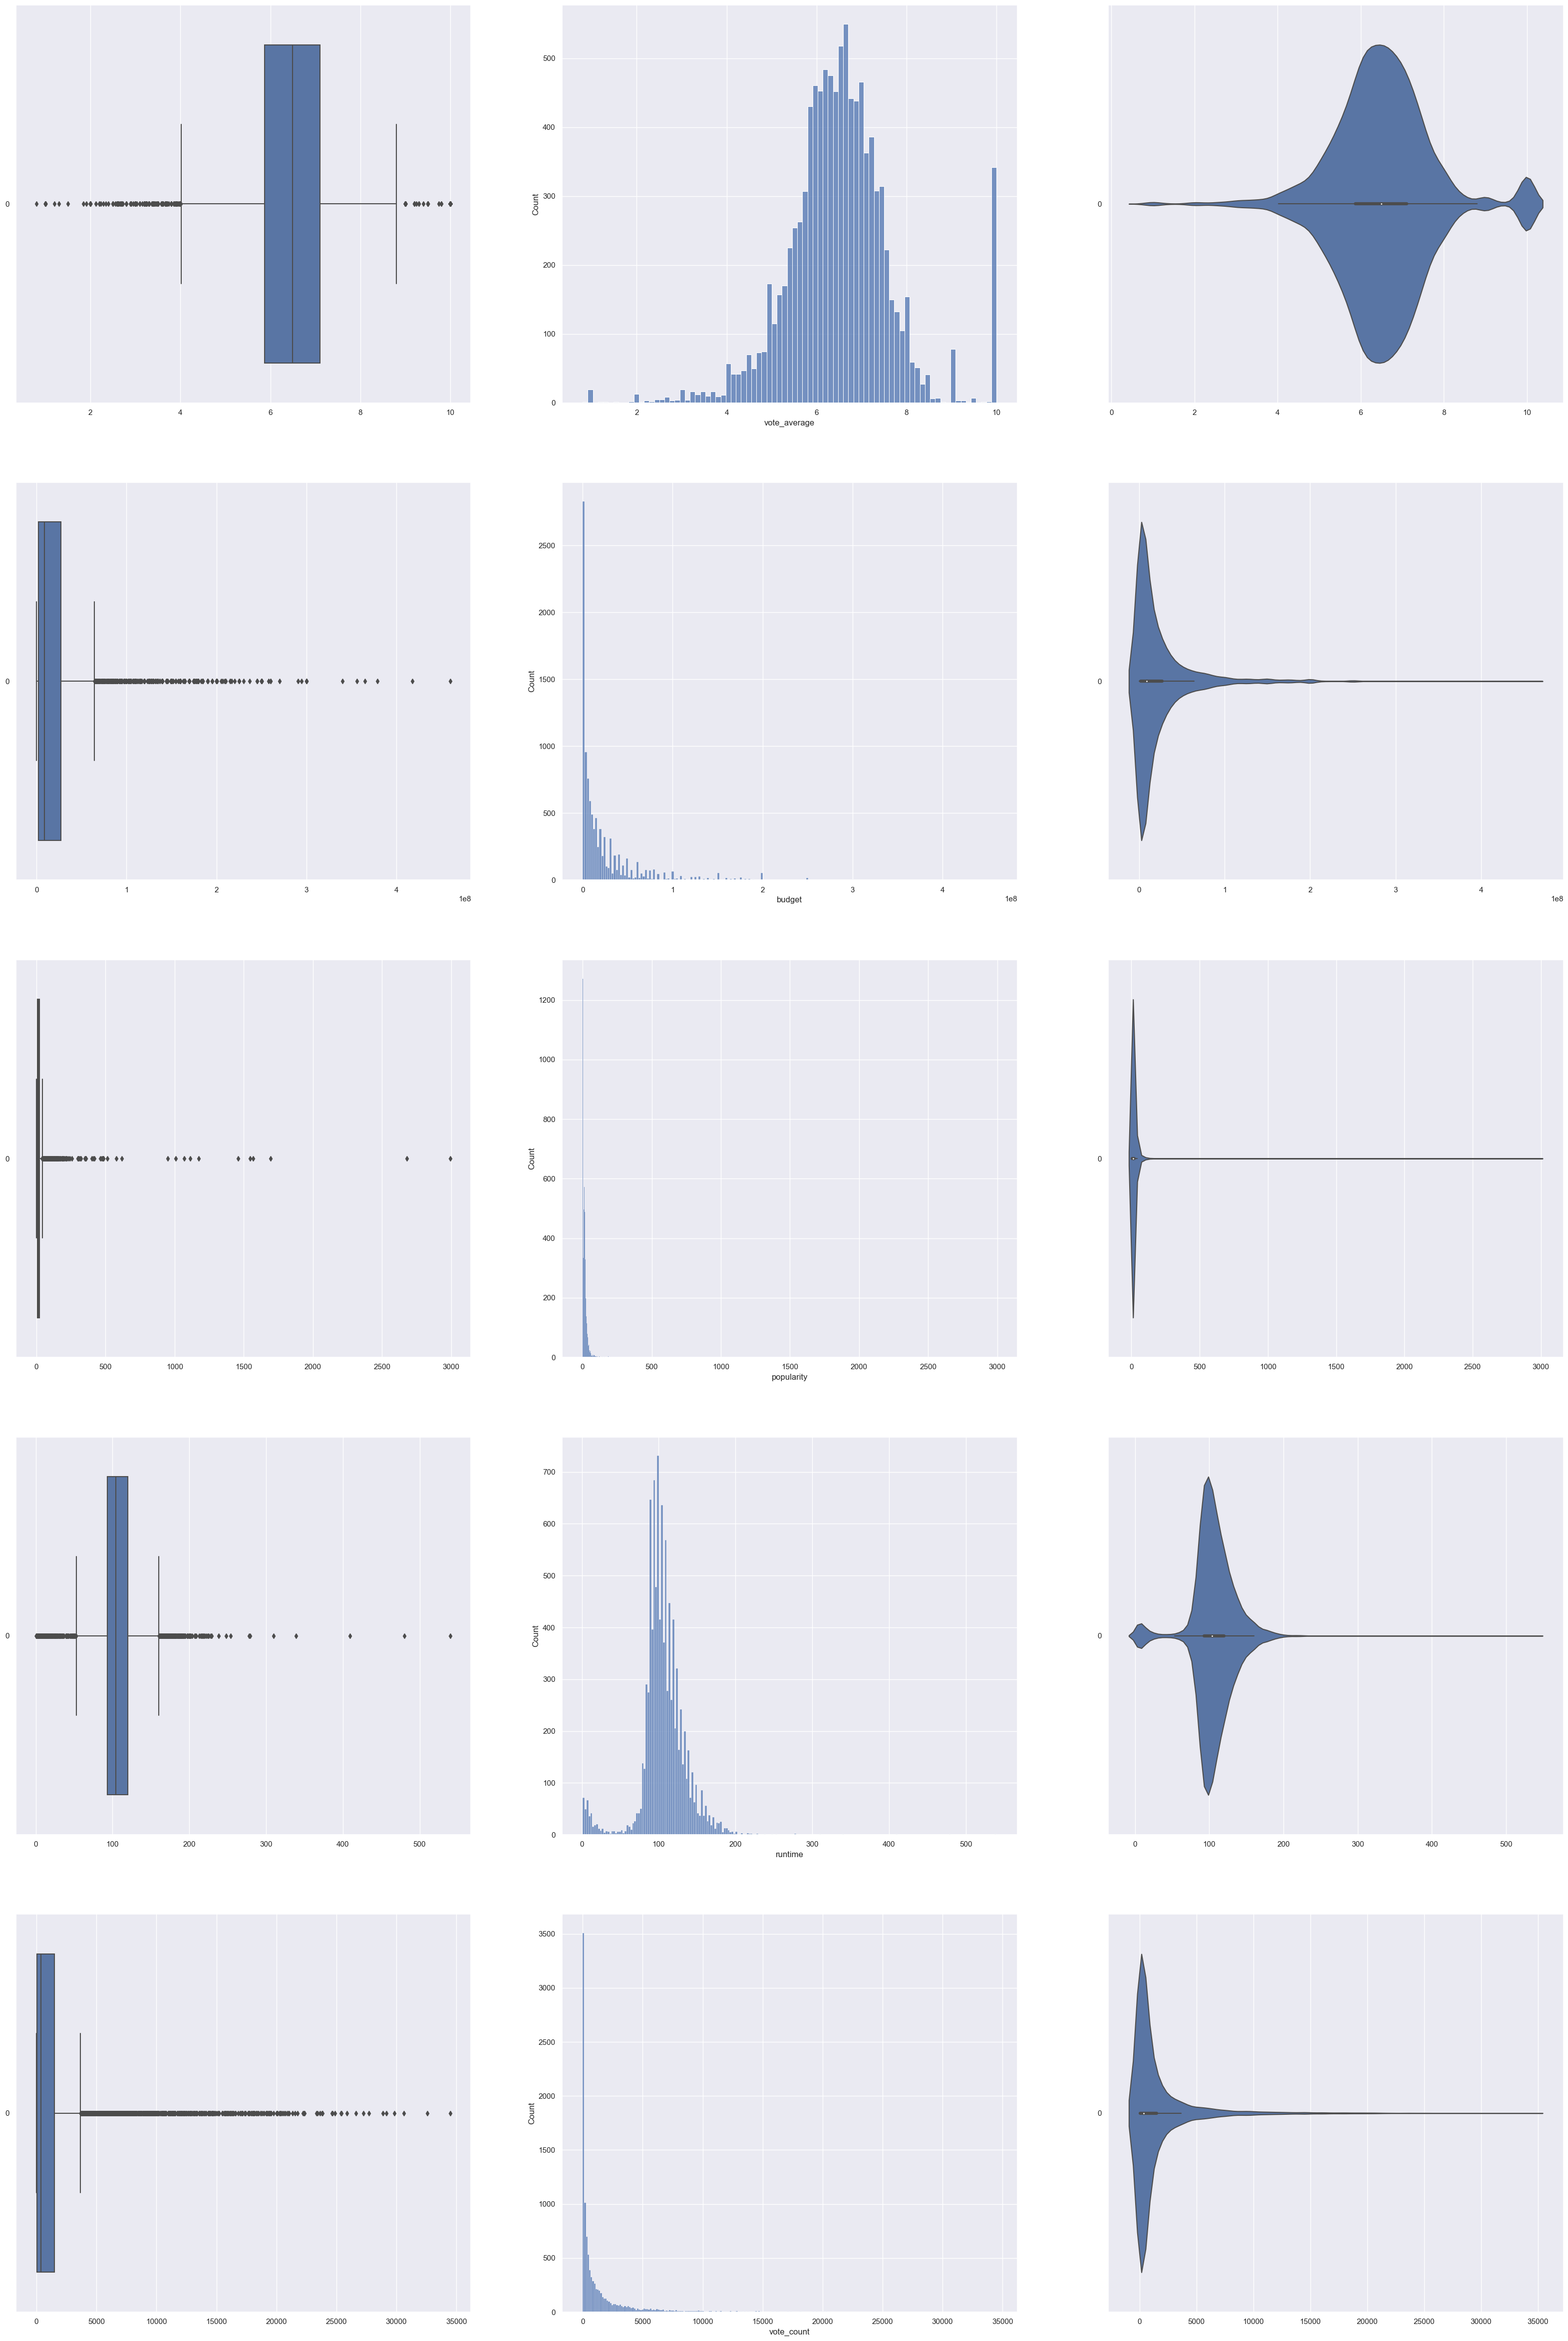

In [832]:
f, axes = plt.subplots(5, 3, figsize=(40, 60))

# Plot the basic uni-variate figures for vote_average
sb.boxplot(data = numericaldata.vote_average, orient = "h", ax = axes[0,0])
sb.histplot(data = numericaldata.vote_average, ax = axes[0,1])
sb.violinplot(data = numericaldata.vote_average, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for budget
sb.boxplot(data = numericaldata.budget, orient = "h", ax = axes[1,0])
sb.histplot(data = numericaldata.budget, ax = axes[1,1])
sb.violinplot(data = numericaldata.budget, orient = "h", ax = axes[1,2])

# Plot the basic uni-variate figures for popularity
sb.boxplot(data = numericaldata.popularity, orient = "h", ax = axes[2,0])
sb.histplot(data = numericaldata.popularity, ax = axes[2,1])
sb.violinplot(data = numericaldata.popularity, orient = "h", ax = axes[2,2])

# Plot the basic uni-variate figures for runtime
sb.boxplot(data = numericaldata.runtime, orient = "h", ax = axes[3,0])
sb.histplot(data = numericaldata.runtime, ax = axes[3,1])
sb.violinplot(data = numericaldata.runtime, orient = "h", ax = axes[3,2])

# Plot the basic uni-variate figures for vote_count
sb.boxplot(data = numericaldata.vote_count, orient = "h", ax = axes[4,0])
sb.histplot(data = numericaldata.vote_count, ax = axes[4,1])
sb.violinplot(data = numericaldata.vote_count, orient = "h", ax = axes[4,2])

as we can see from the graph above, most of the numerical variables are skewed to the left

## Now we take a look at the visualisation for our response variable which is revenue

In [833]:
numericaldata["revenue"].describe()

count    1.023300e+04
mean     6.515736e+07
std      1.550578e+08
min      1.000000e+00
25%      1.601000e+06
50%      1.223263e+07
75%      5.650506e+07
max      2.923706e+09
Name: revenue, dtype: float64

<Axes: >

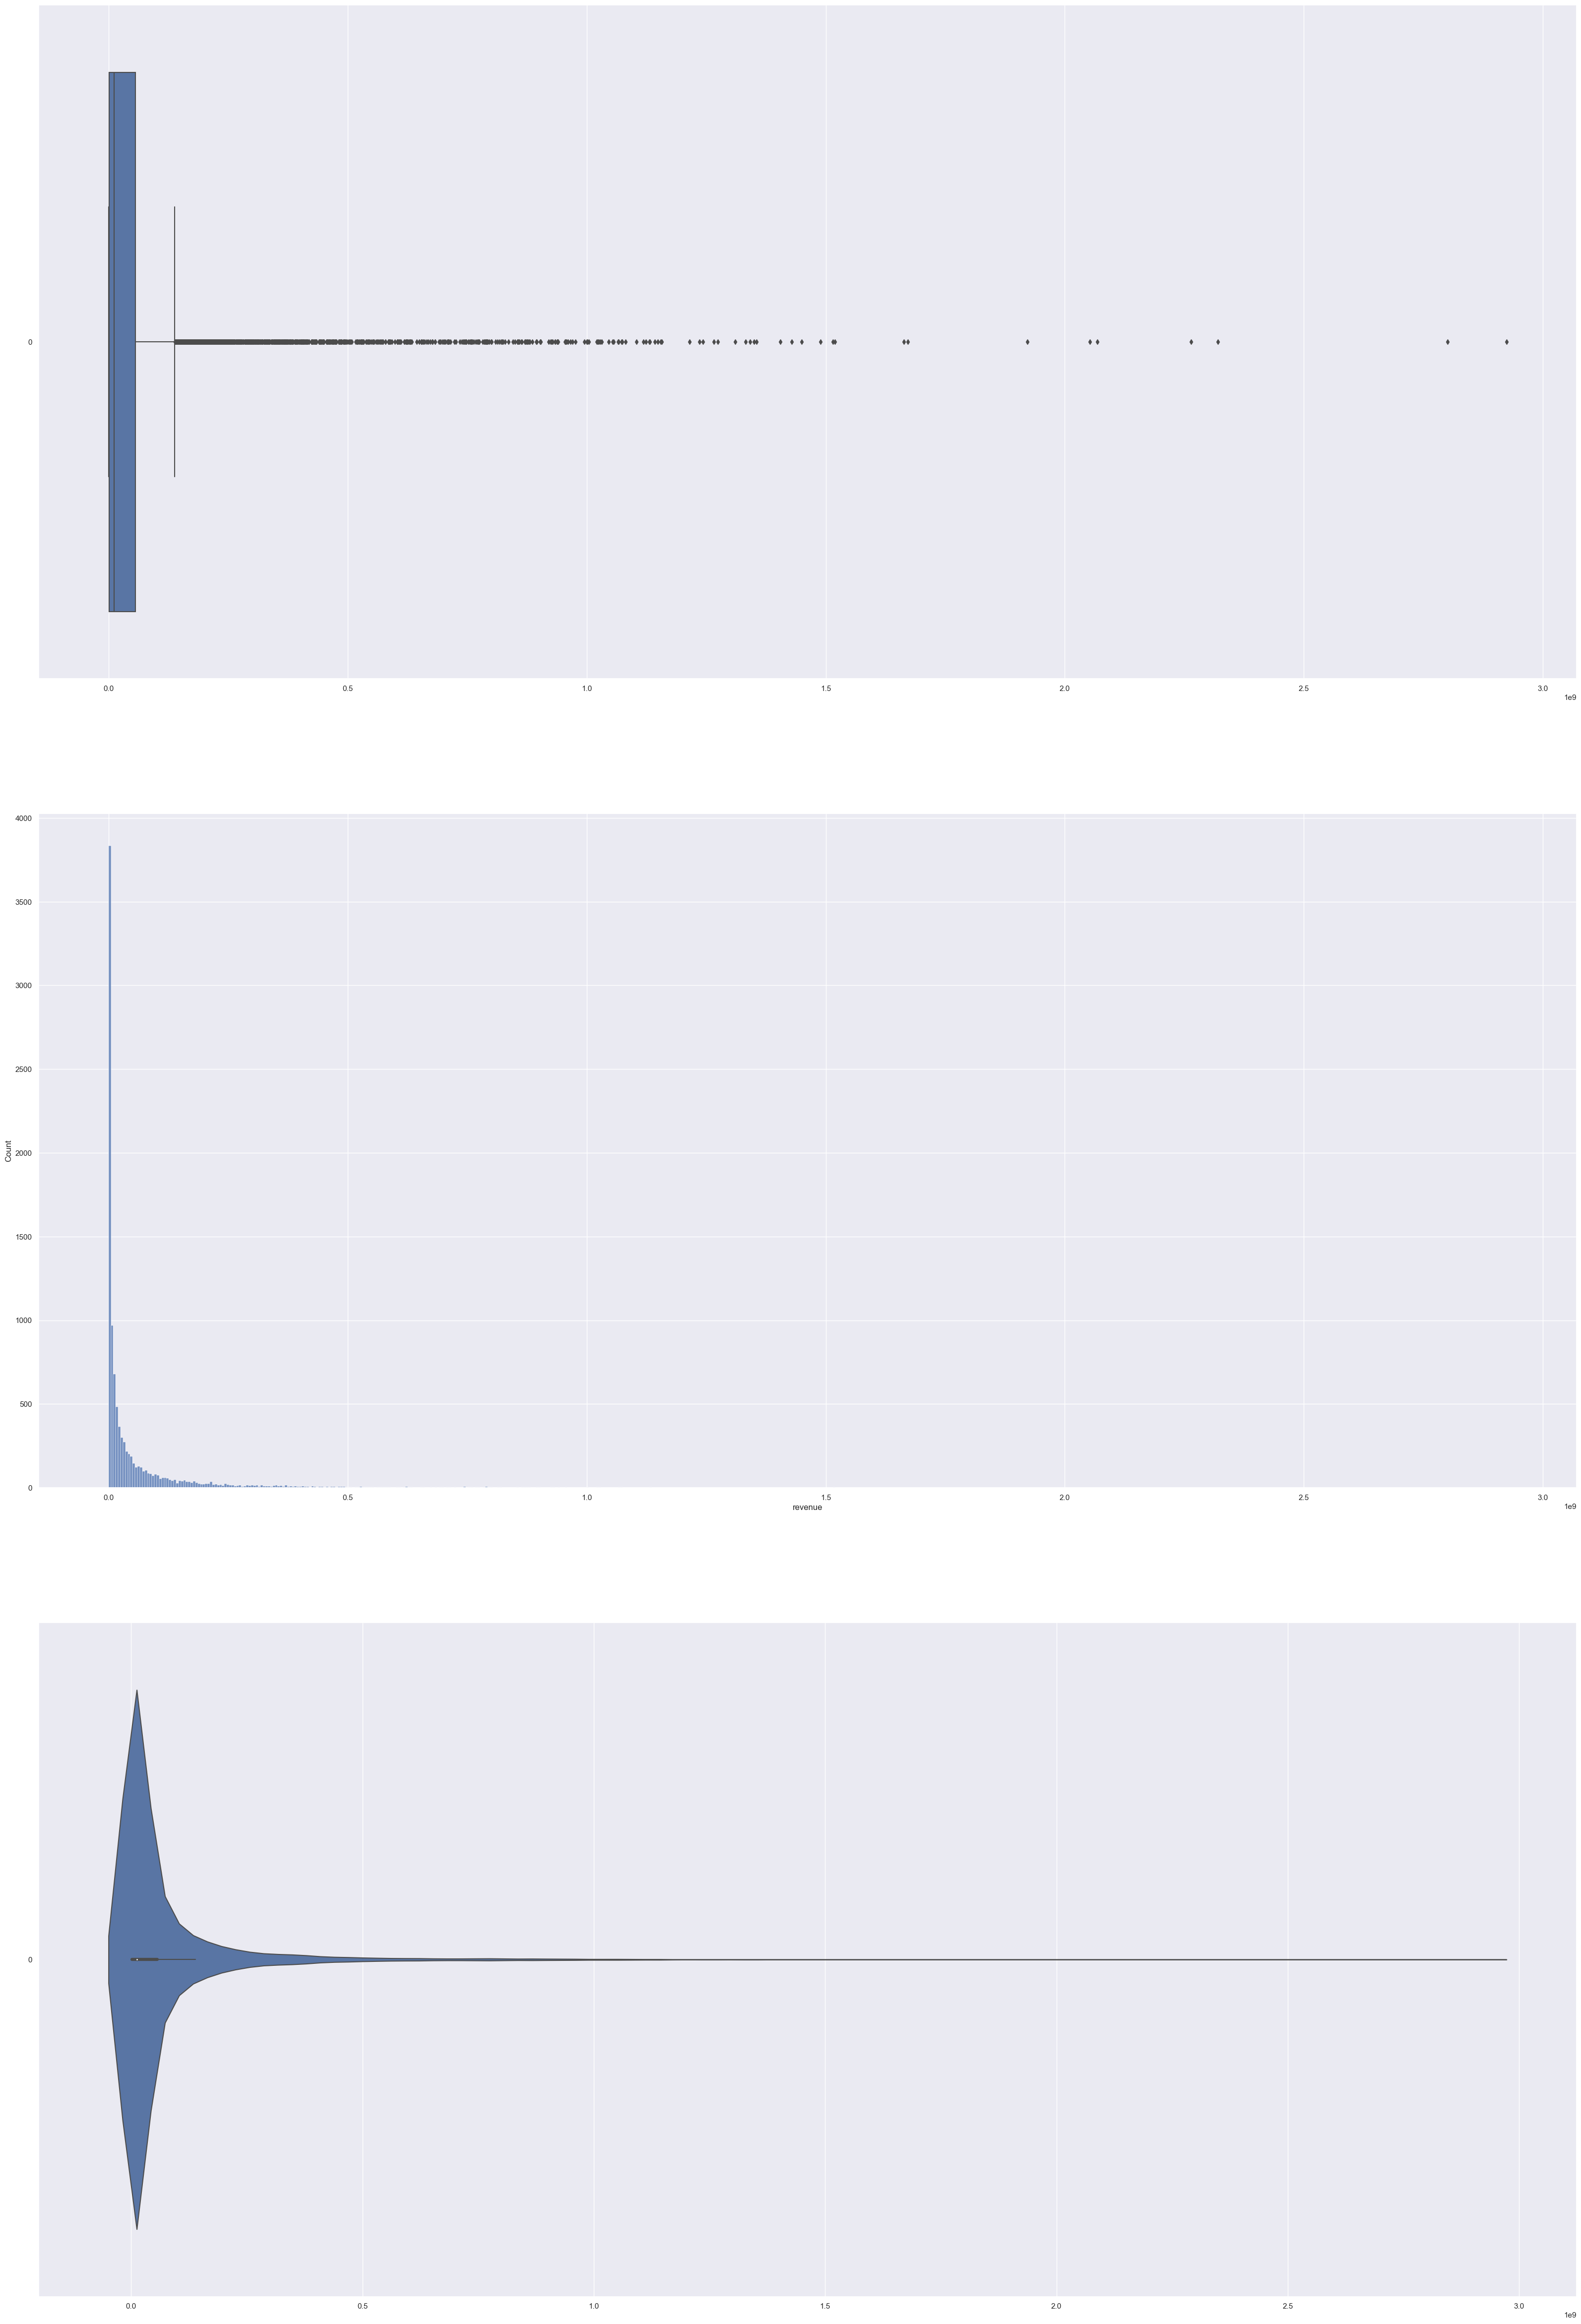

In [834]:
f, axes = plt.subplots(3,figsize=(40, 60))
sb.boxplot(data = numericaldata["revenue"], orient = "h", ax = axes[0])
sb.histplot(data = numericaldata["revenue"],ax = axes[1])
sb.violinplot(data = numericaldata["revenue"], orient = "h", ax = axes[2])

## 75th percentile revenue marking

We want to know the movie at the 75th percentile and above, what is the revenue that those top movies are making for its revenue

In [835]:
np.percentile(numericaldata["revenue"], 75)

56505065.0

#### Now, we look at the correlation between our numerical variables and our response variable which is revenue

In [836]:
numericaldata.corr()

,revenue,vote_average,budget,popularity,runtime,vote_count
revenue,1.000000,0.116287,0.740268,0.231455,0.179157,0.749390
vote_average,0.116287,1.000000,0.010317,0.063191,-0.059421,0.206162
budget,0.740268,0.010317,1.000000,0.245569,0.215137,0.596420
popularity,0.231455,0.063191,0.245569,1.000000,0.076665,0.193363
runtime,0.179157,-0.059421,0.215137,0.076665,1.000000,0.188759
vote_count,0.749390,0.206162,0.596420,0.193363,0.188759,1.000000


<Axes: >

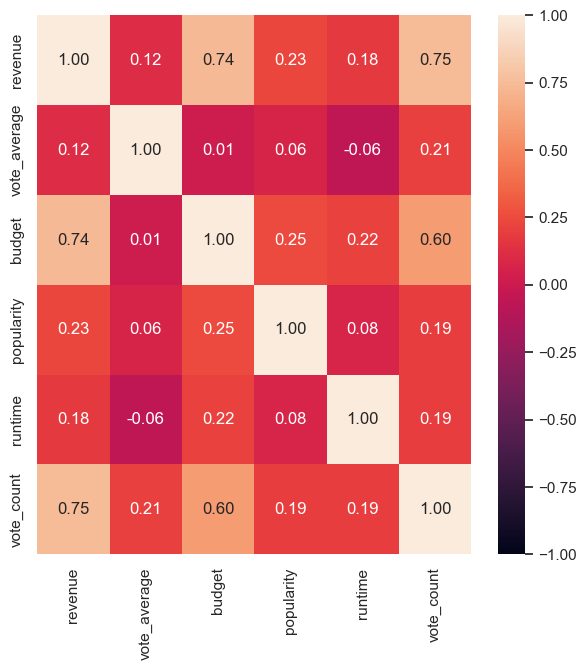

In [837]:
f = plt.figure(figsize=(7,7))
sb.heatmap(numericaldata.corr(), vmin= -1, vmax = 1, annot = True, fmt = ".2f")

Looking at the heatmap above, the correlation for revenue and all other numerical variables except for budget and vote_count, have a low correlation, with all their correlation being below 0.25 while vote count have a correlation of 0.75 and budget having a correlation of 0.74. This shows that only 2 variables have a high linear correlation with revenue, so they have a strong linear relationship, thus we will only a linear regression model


Now let's look at the various scatter plot

/Users/bertvwu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


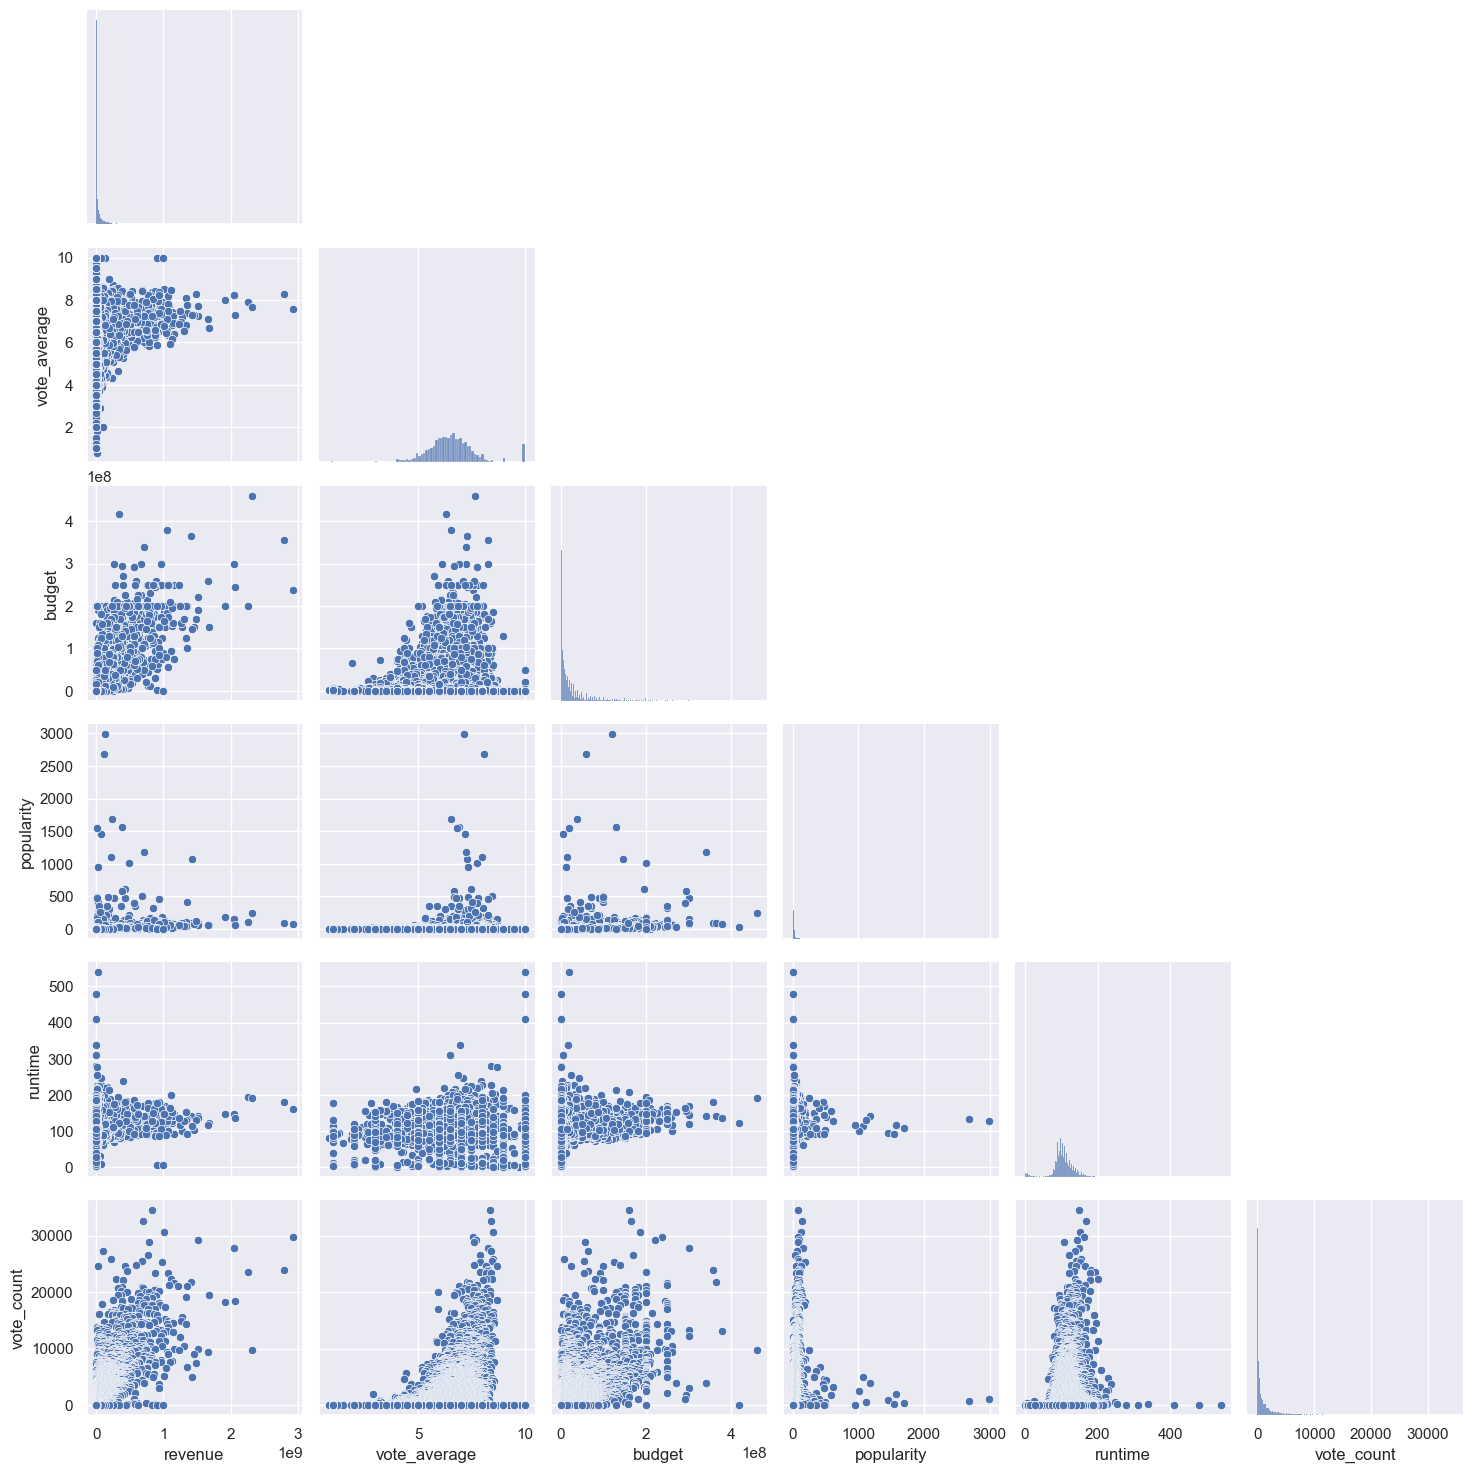

In [838]:
sb.pairplot(data = numericaldata, corner = True)

as seen from the above scatter plot it can also be seen that vote_count and budget are the ones with higher correlation with revenue as most the the points in the those 2 graphs are following a pattern, the data are mostly trending in the same direction so there is a higher correlation among those 2 variables than the other variables

# Categorical variables

Now let us take a look at some of the catagorical variables in the data set. The categorical variables that we have chosen are genres and original language. The reasons are original language of a movie can significantly influence its marketability and appeal to audiences worldwide, Genre is a crucial factor influencing audience preferences and box office performance. Different genres attract different audience segments with varying expectations.

In [839]:
categoricaldata = sievedtmdbdata[["original_language","genres","revenue"]]
categoricaldata

,original_language,genres,revenue
0,en,"Action, Science Fiction, Adventure",8.255328e+08
1,en,"Adventure, Drama, Science Fiction",7.017292e+08
2,en,"Drama, Action, Crime, Thriller",1.004558e+09
3,en,"Action, Adventure, Fantasy, Science Fiction",2.923706e+09
4,en,"Science Fiction, Action, Adventure",1.518816e+09
...,...,...,...
346034,en,"Drama, Action",1.122000e+03
346035,en,"Romance, Comedy, Drama",4.742860e+05
346215,en,Horror,1.000000e+03
346490,th,"Drama, Action, Horror",8.903800e+04


The categorical variables that we have choosen are genres and original language.

In [840]:
print("Number of languages :", len(categoricaldata["original_language"].unique()))
print(categoricaldata["original_language"].value_counts())

Number of languages : 64
original_language
en    7925
hi     314
fr     293
ru     208
es     192
      ... 
iu       1
ku       1
la       1
nb       1
ab       1
Name: count, Length: 64, dtype: int64


#### Since there are way too many different languages in the dataset, if we were to select all the different languages it would be very hard to plot out our diagram as there would be to many different unique values so for this case we will only be looking at languages which are used way more commonly in movies, such as english, japanese and russian.

In [841]:
morelanguage = categoricaldata[categoricaldata["original_language"].isin(["en","hi","fr","ru","es","ta","ml","ja","ko","zh","it","te","de"])]

/Users/bertvwu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


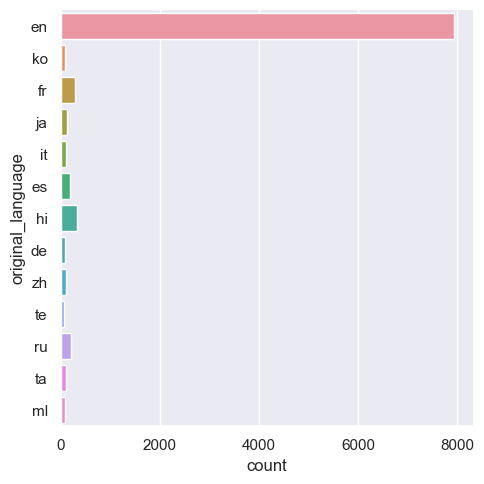

In [842]:
sb.catplot(y = "original_language", data = morelanguage, kind = "count")

Now lets us see our categorical variables against our response variable which is revenue

Original_language against revenue

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


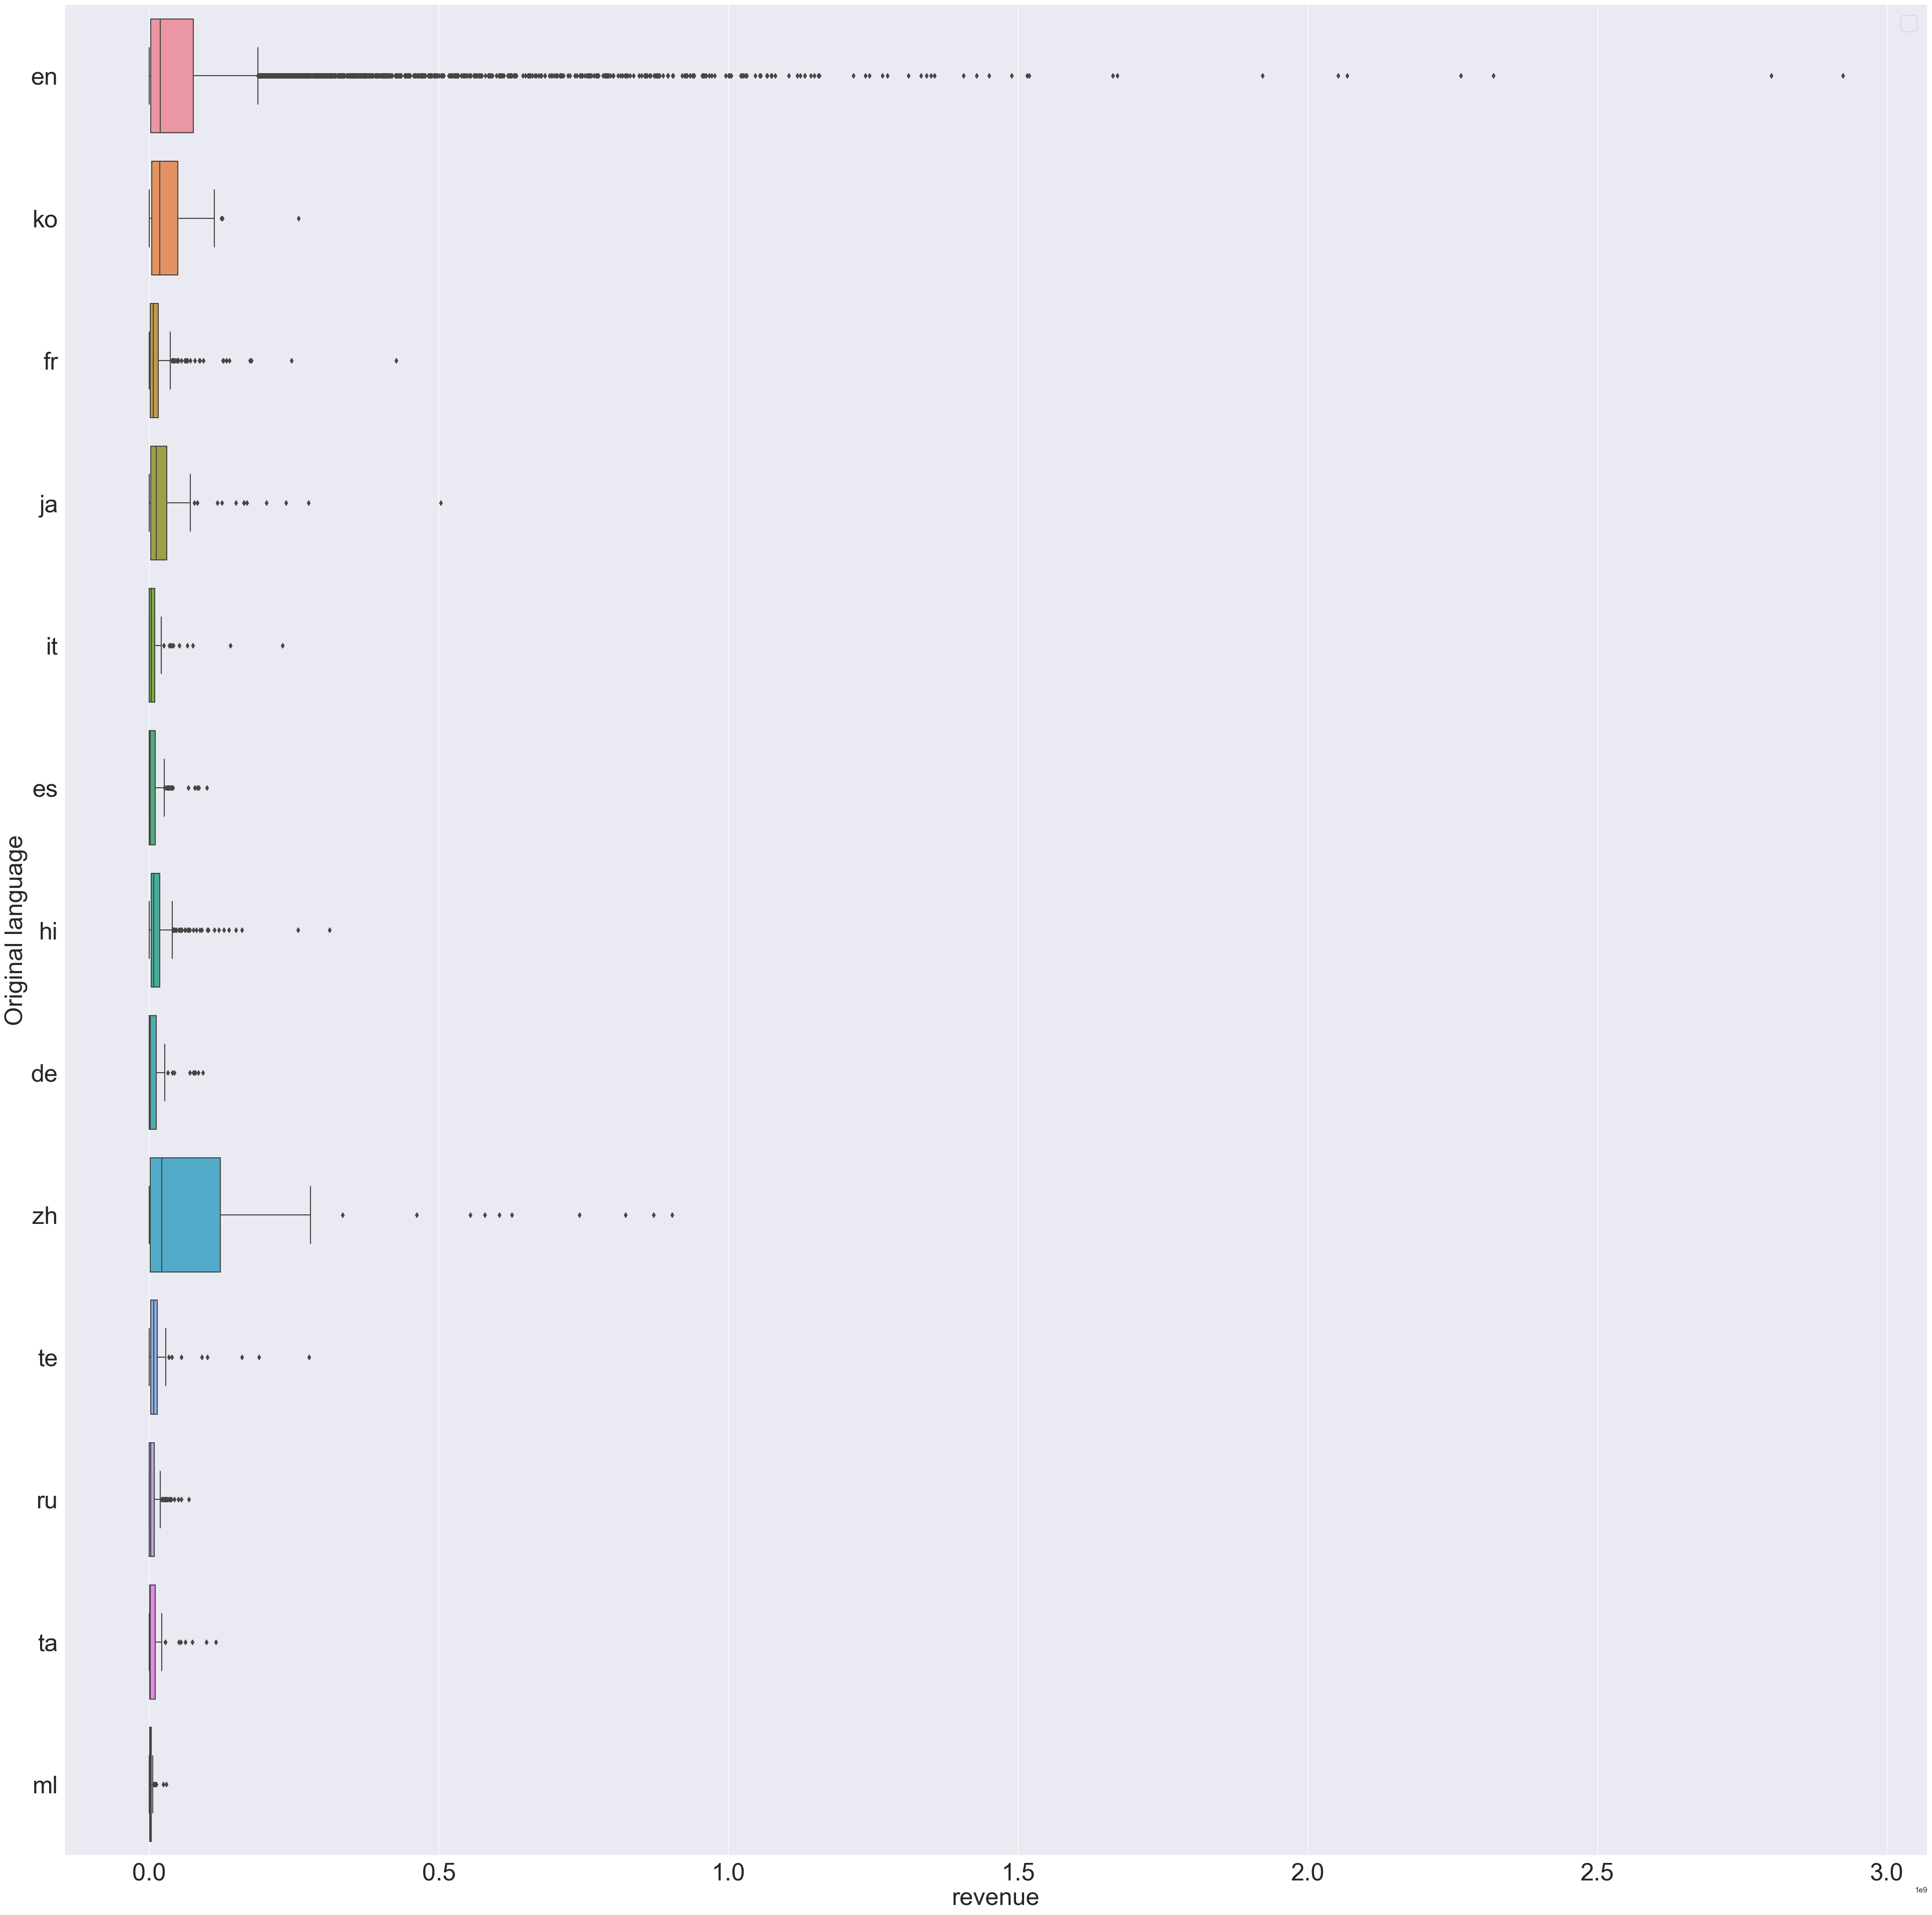

In [843]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "revenue", y = "original_language", data = morelanguage, orient = "h", width = 0.8)
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35)
ax.set_xlabel("revenue",fontsize=35)
ax.set_ylabel("Original language",fontsize=35)
plt.legend(fontsize=30)
plt.show()

From the above graph, we see that zh,ja,kr,en have a higher median revenue as compared to the rest of the other original_language.

In [844]:
categoricaldata["genres"].value_counts()

genres
Drama                                                     682
Comedy                                                    577
Drama, Romance                                            332
Comedy, Drama                                             293
Comedy, Romance                                           282
                                                         ... 
Action, Comedy, Horror                                      1
Drama, Romance, Science Fiction, Adventure                  1
Thriller, Adventure, Fantasy, Science Fiction, Romance      1
Fantasy, Drama, Thriller, Mystery, Romance                  1
Drama, Action, Horror                                       1
Name: count, Length: 2000, dtype: int64

So the most frequent genres are comedy, comedy, drama and romance



We now want to look at all the single unique genres 

In [845]:
genres = sievedtmdbdata['genres']
genres.str.split(',')

ag = genres.str.replace(' ', '').str.split(',')
all_genres = set()
for x in ag:
    if (type(x) == type([0])):
        all_genres = all_genres.union(set(x))
        
print(all_genres)

{'War', 'Thriller', 'Horror', 'Mystery', 'TVMovie', 'Fantasy', 'Crime', 'History', 'Documentary', 'Animation', 'Comedy', 'Music', 'Drama', 'Romance', 'Action', 'Family', 'Western', 'Adventure', 'ScienceFiction'}


### As some movies have multiple genres attached to it, the following graph is just counting whenever a movie has a specific genre, so it counts the frequency of each individual genre

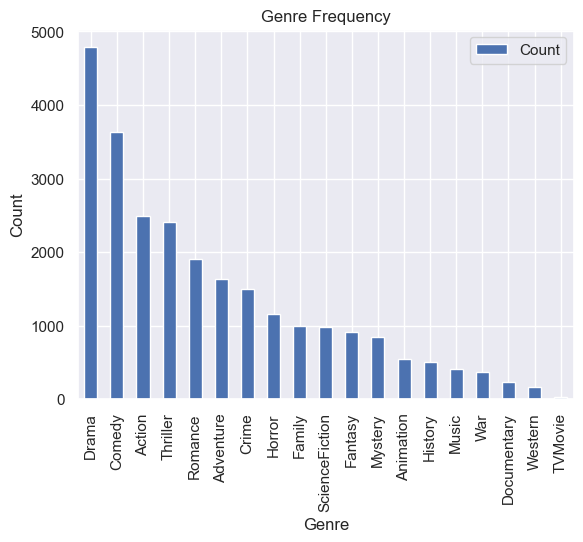

In [846]:
# Count the frequency of each genre
genre_counts = {}
for genre_list in ag:
    if isinstance(genre_list, list):
        for genre in genre_list:
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1

# Convert the dictionary to a DataFrame
df_genre_counts = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Plot the data
df_genre_counts.sort_values('Count', ascending=False).plot(kind='bar', x='Genre', y='Count')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Genre Frequency')
plt.show()

The below table shows the frequency of each genre appearing in the entire movie dataset

In [847]:
df_genre_counts.head()

,Genre,Count
0,Action,2495
1,ScienceFiction,982
2,Adventure,1633
3,Drama,4784
4,Crime,1503


Since multiple genres are attached to one movie, it is challenging to see if the relationship between genres and revenue. So, in order to see if there is a correlation between genres and revenue, the first genre in the list of genres was taken to compare, as the genres do not seem to be arranged in the alphabetical order or by the id order, so there may be another reason that the genres are arranged in such a way, with one reason being it was decided as the most relevant and appropriate genre associated to that movie

In [848]:
firstgenre = []
for eachmovie in categoricaldata['genres']:
    try:
        eachmovie = literal_eval(eachmovie)
        firstgenre.append(eachmovie[0])
    except:
        firstgenre.append(np.nan)
newgenre = categoricaldata.copy()
newgenre["first_genre"] = firstgenre

newgenre['first_genre'] = newgenre['genres'].str.split(',').apply(lambda x: x[0].strip() if isinstance(x, list) and len(x) > 0 else None)
newgenre

,original_language,genres,revenue,first_genre
0,en,"Action, Science Fiction, Adventure",8.255328e+08,Action
1,en,"Adventure, Drama, Science Fiction",7.017292e+08,Adventure
2,en,"Drama, Action, Crime, Thriller",1.004558e+09,Drama
3,en,"Action, Adventure, Fantasy, Science Fiction",2.923706e+09,Action
4,en,"Science Fiction, Action, Adventure",1.518816e+09,Science Fiction
...,...,...,...,...
346034,en,"Drama, Action",1.122000e+03,Drama
346035,en,"Romance, Comedy, Drama",4.742860e+05,Romance
346215,en,Horror,1.000000e+03,Horror
346490,th,"Drama, Action, Horror",8.903800e+04,Drama


In [849]:
newgenre["first_genre"].value_counts()

first_genre
Drama              2394
Comedy             2180
Action             1535
Horror              683
Adventure           577
Crime               464
Thriller            459
Animation           316
Romance             300
Science Fiction     233
Fantasy             214
Family              204
Documentary         175
Mystery             139
Music               121
War                 100
Western              72
History              64
TV Movie              3
Name: count, dtype: int64

/Users/bertvwu/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


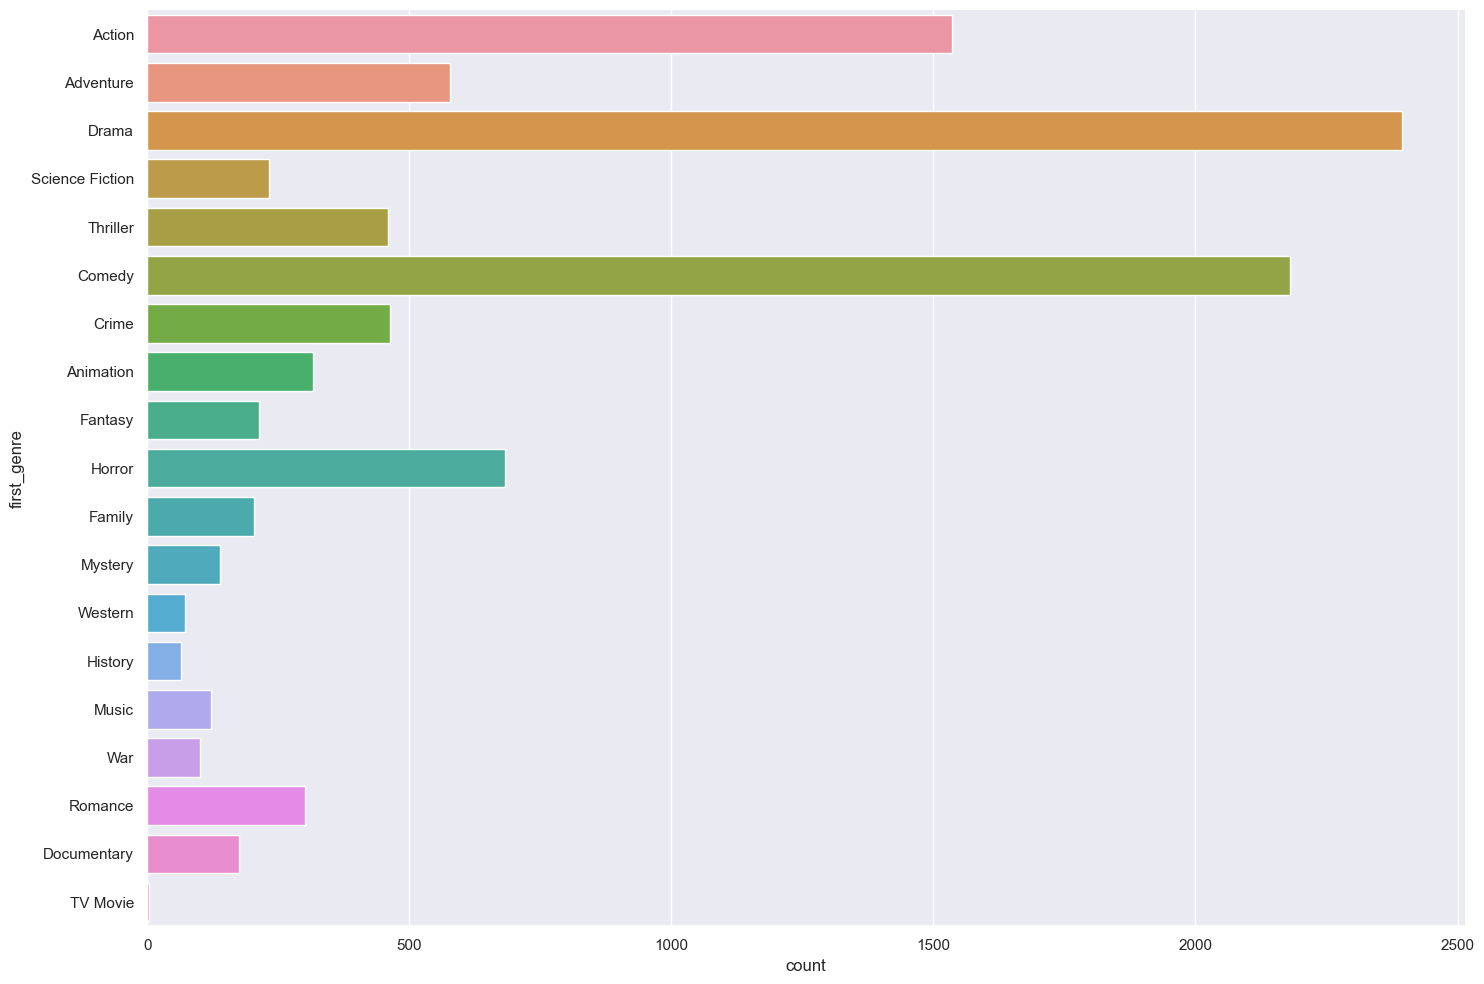

In [850]:
sb.catplot(y = "first_genre", data = newgenre, kind = "count", height= 10, aspect= 1.5)

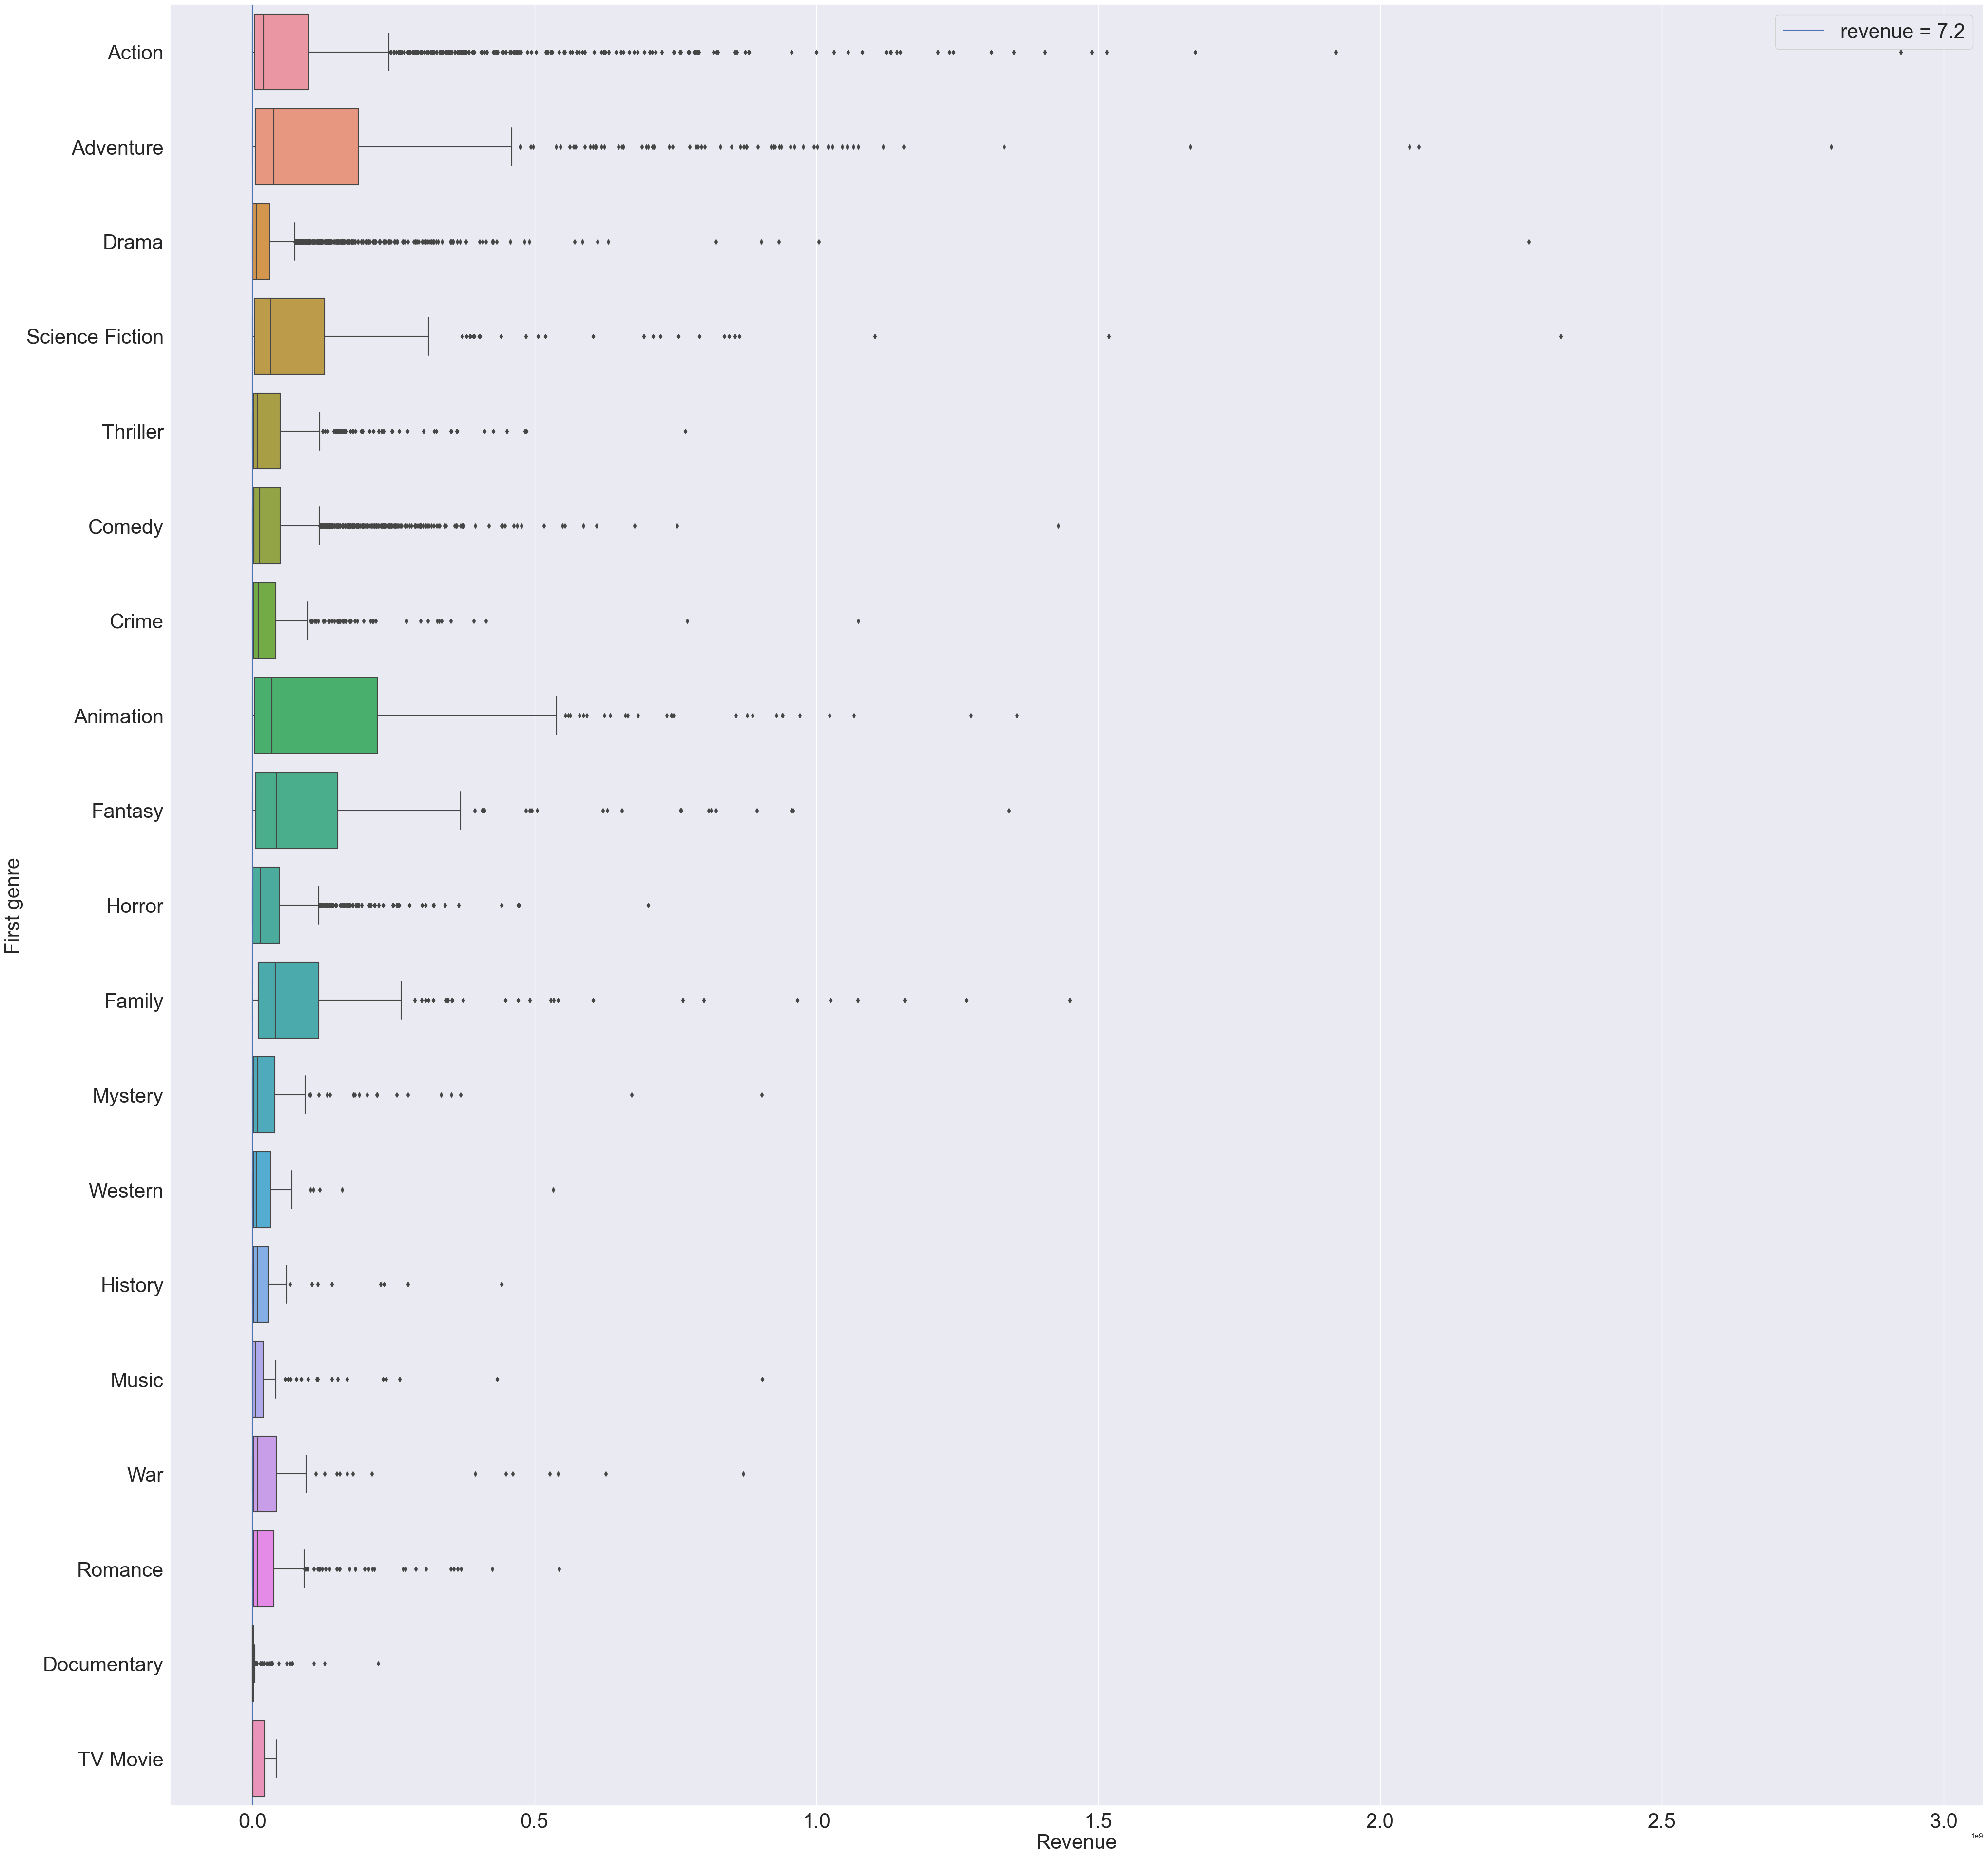

In [851]:
f, ax= plt.subplots(figsize=(48, 48))
sb.boxplot(x = "revenue", y = "first_genre", data = newgenre, orient = "h")
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.set_xlabel("Revenue",fontsize=30)
ax.set_ylabel("First genre",fontsize=30)
plt.axvline(7.2, label= "revenue = 7.2")
plt.legend(fontsize=30)
plt.show()

Looking at the box-plot which shows the relationship between a categorical variable(genre) and numeric variable(revenue) we can see that there is a higer median for genres such as adventure,fantasy and animation.

We can then infer that such genres such as adventure,fantasy and animation as those genres have a higher median than genres such as crime,music.

Now we are adding the new column "first_genre" to our original data frame

In [852]:
sievedtmdbdata['first_genre'] = newgenre['first_genre']
sievedtmdbdata

,id,title,status,revenue,vote_average,vote_count,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,first_genre
0,27205,Inception,Released,8.255328e+08,8.364,34495.0,148.0,False,160000000.0,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",Action
1,157336,Interstellar,Released,7.017292e+08,8.417,32571.0,169.0,False,165000000.0,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,Adventure
2,155,The Dark Knight,Released,1.004558e+09,8.512,30619.0,152.0,False,185000000.0,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",Drama
3,19995,Avatar,Released,2.923706e+09,7.573,29815.0,162.0,False,237000000.0,en,79.932,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish",Action
4,24428,The Avengers,Released,1.518816e+09,7.710,29166.0,143.0,False,220000000.0,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",Science Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346034,592192,WWR Adios Aurora,Released,1.122000e+03,10.000,1.0,110.0,False,8665.0,en,1.127,"Drama, Action",Women's Wrestling Revolution,United States of America,English,Drama
346035,309625,Winter Carnival,Released,4.742860e+05,6.000,1.0,105.0,False,412640.0,en,0.636,"Romance, Comedy, Drama",Walter Wanger Productions,United States of America,English,Romance
346215,280402,Freaky Night,Released,1.000000e+03,4.500,1.0,15.0,False,500.0,en,0.600,Horror,Mystery Forest,Norway,NaN,Horror
346490,402714,Sming,Released,8.903800e+04,6.000,1.0,105.0,False,15000000.0,th,1.405,"Drama, Action, Horror",Fast Time Motion Pictures,Thailand,Thai,Drama
